In [1]:
#from Encoder import Encoder
from Encoder2 import Encoder
import keras 
from sklearn.model_selection import train_test_split
import pandas as pd 
import tensorflow as tf
import numpy as np 

file_path = 'C:\\Users\\nvanb\\Documents\\Master\\1 - Masterstage\\Fibonacci_data_5000.csv'
df_data = pd.DataFrame(pd.read_csv(file_path))

(64, 8, 64)
q_reshaped = tf.Tensor(
[[[[ 1.14318264e+00 -2.35083506e-01 -9.39252693e-03 ... -1.01588857e+00
    -1.13860738e+00 -1.54088712e+00]
   [-1.16907917e-01 -6.20661855e-01 -1.19745636e+00 ... -8.38301778e-01
    -2.19767189e+00 -4.66375113e-01]
   [ 2.80974656e-01  1.00370146e-01 -6.10522032e-01 ...  4.57901627e-01
    -2.28026199e+00  7.09957704e-02]
   ...
   [ 3.68091077e-01  3.06187600e-01  2.80517757e-01 ... -4.72302623e-02
    -9.04588223e-01  5.46034217e-01]
   [ 4.12028283e-01 -7.26769865e-01 -4.28529114e-01 ... -1.64323545e+00
     8.87003303e-01 -1.26953706e-01]
   [-2.06870642e-02  5.61172962e-02  1.66266286e+00 ... -2.89597392e-01
     1.20230198e+00  7.25812256e-01]]

  [[ 3.17175873e-02 -6.02738380e-01 -7.23402321e-01 ...  6.11647904e-01
     5.71548522e-01  5.81136867e-02]
   [-3.76032376e+00  1.05560470e+00  1.64405569e-01 ... -4.55072224e-01
     2.00745177e+00  8.83912981e-01]
   [-1.25447106e+00 -2.20429397e+00  3.98713827e-01 ... -3.02327186e-01
    -9.3622

In [2]:
df_data

0  1  2   3   4   5   6
0     3  5  8  13  21  34  55
1     2  3  5   8  13  21  34
2     2  3  5   8  13  21  34
3     1  1  2   3   5   8  13
4     3  5  8  13  21  34  55
...  .. .. ..  ..  ..  ..  ..
4995  2  3  5   8  13  21  34
4996  0  1  1   2   3   5   8
4997  2  3  5   8  13  21  34
4998  1  1  2   3   5   8  13
4999  3  5  8  13  21  34  55

[5000 rows x 7 columns]

In [3]:
def define_targets_and_features(df): 
    """Function defines the features and targets of a dataframe,
    The targets are in the last column of the dataframe; the features are in the other columns"""
    
    features, targets = df.keys()[0:-1], df.keys()[1:]
    return features, targets 

df_train, df_test = train_test_split(df_data, train_size=0.8, random_state=0)
features, targets = define_targets_and_features(df_data)


In [14]:
d_model = 512
d_ff = 2048
batch_size = 64
h = 8 
n = 6
d_k = 8
d_v = int(batch_size/h)
rate = 0.1

n_events = df_data.shape[0]

#print(seq_length)
vocab_size = np.max(np.max(df_data), axis=0)+1 # add one because we include 0
padding_mask = None
seq_length = vocab_size #df_data.shape[1]+3

In [15]:
tf_train_features = tf.constant(df_train[features])
tf_train_targets = tf.constant(df_train[targets])

tf_test_features = tf.constant(df_test[features])
tf_test_targets = tf.constant(df_test[targets])


In [16]:
# Define the loss function and optimizer
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam()

In [17]:
#encoder_model = keras.Sequential()
#encoder_model.add(Encoder(batch_size, seq_length, h, n, d_model, d_ff, d_k, d_v, rate))
encoder_model = Encoder(batch_size, seq_length, h, n, d_model, d_ff, d_k, d_v, rate, vocab_size, d_model, padding_mask, training=True)
#encoder_model(vocab_size, d_model, tf_train_features, padding_mask)

encoder_model.build(input_shape=(5000,7))
encoder_model.summary()


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
q_reshaped = Tensor("transpose:0", shape=(5000, 8, 7, 1), dtype=float32)
o_reshaped =  (5000, 8, 7, 1)
output shape =  (5000, 7, 8)
multihead_output shape = (5000, 7, 512)
(5000, 7, 512)
x shape =  (5000, 7, 512)
q_reshaped = Tensor("transpose_4:0", shape=(5000, 8, 7, 1), dtype=float32)
o_reshaped =  (5000, 8, 7, 1)
output shape =  (5000, 7, 8)
multihead_output shape = (5000, 7, 512)
(5000, 7, 512)
x shape =  (5000, 7, 512)
q_reshaped = Tensor("transpose_8:0", shape=(5000, 8, 7, 1), dtype=float32)
o_reshaped =  (5000, 8, 7, 1)
output shape =  (5000, 7, 8)
multihead_output shape = (5000, 7, 512)
(5000, 7, 512)
x shape =  (5000, 7, 512)
q_reshaped = Tensor("transpose_12:0", shape=(5000, 8, 7, 1), dtype=float32)
o_reshaped =  (5000, 8, 7, 1)
output shape =  (5000, 7, 8)
multihead_output shape = (5000, 7, 512)
(5000, 7, 512)
x shape =  (5000, 7, 512)
q_reshaped = Tensor("transpose_16:0", shape=(5000, 8, 7, 1), dtype=float32)
o_reshaped =  (50

In [18]:
encoder_model.summary()
encoder_model.compile(optimizer, loss=loss_function)
history = encoder_model.fit(tf_train_features, tf_train_targets, epochs=10, validation_data=(tf_test_features, tf_test_targets))

Model: "encoder_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 positional_embedding_fixed_  multiple                 0 (unused)
 weights_2 (PositionalEmbedd                                     
 ingFixedWeights)                                                
                                                                 
 encoder_layer_12 (EncoderLa  multiple                 0 (unused)
 yer)                                                            
                                                                 
 encoder_layer_13 (EncoderLa  multiple                 0 (unused)
 yer)                                                            
                                                                 
 encoder_layer_14 (EncoderLa  multiple                 0 (unused)
 yer)                                                            
                                                         

In [21]:
history.history

{'loss': [2.4605839252471924,
  2.302586555480957,
  2.302584409713745,
  2.302584409713745,
  2.302584409713745,
  2.3025851249694824,
  2.3025858402252197,
  2.302586078643799,
  2.302584409713745,
  2.302584409713745],
 'val_loss': [2.302586078643799,
  2.302586317062378,
  2.302586078643799,
  2.302586078643799,
  2.302586078643799,
  2.302586078643799,
  2.302586078643799,
  2.302586078643799,
  2.302586078643799,
  2.302586078643799]}

In [30]:
epoch_history = [_ for _ in range (1,11)]
loss_history = history.history['loss']
val_loss_history = history.history['val_loss']

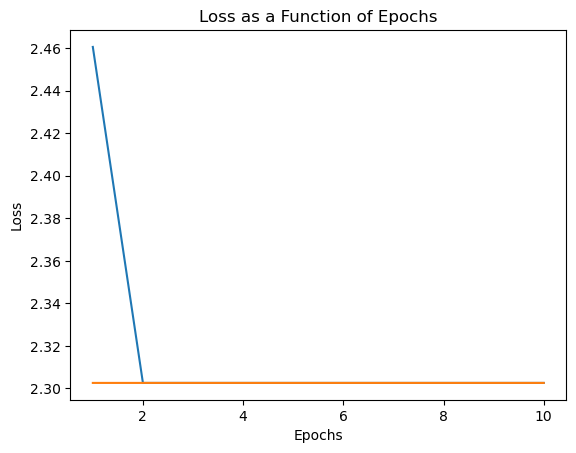

In [36]:
import matplotlib.pyplot as plt
plt.plot(epoch_history, loss_history)
plt.plot(epoch_history, val_loss_history)
plt.title('Loss as a Function of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [39]:
#encoder_model.save(f"C:\\Users\\nvanb\\Documents\\Master\\1 - Masterstage\\Encoder\\Encoder\\first_transformer_model.h5")

tf.saved_model.save(encoder_model, "C:\\Users\\nvanb\\Documents\\Master\\1 - Masterstage\\Encoder\\Encoder\\first_transformer_model.h5")

q_reshaped = Tensor("encoder_2/transpose:0", shape=(None, 8, 6, None), dtype=float32)
o_reshaped =  (None, 8, 6, None)
output shape =  (None, 6, 8)
multihead_output shape = (None, 6, 512)
(None, 6, 512)
x shape =  (None, 6, 512)
q_reshaped = Tensor("encoder_2/transpose_4:0", shape=(None, 8, 6, None), dtype=float32)
o_reshaped =  (None, 8, 6, None)
output shape =  (None, 6, 8)
multihead_output shape = (None, 6, 512)
(None, 6, 512)
x shape =  (None, 6, 512)
q_reshaped = Tensor("encoder_2/transpose_8:0", shape=(None, 8, 6, None), dtype=float32)
o_reshaped =  (None, 8, 6, None)
output shape =  (None, 6, 8)
multihead_output shape = (None, 6, 512)
(None, 6, 512)
x shape =  (None, 6, 512)
q_reshaped = Tensor("encoder_2/transpose_12:0", shape=(None, 8, 6, None), dtype=float32)
o_reshaped =  (None, 8, 6, None)
output shape =  (None, 6, 8)
multihead_output shape = (None, 6, 512)
(None, 6, 512)
x shape =  (None, 6, 512)
q_reshaped = Tensor("encoder_2/transpose_16:0", shape=(None, 8, 6, None), dty

INFO:tensorflow:Assets written to: C:\Users\nvanb\Documents\Master\1 - Masterstage\Encoder\Encoder\first_transformer_model.h5\assets


INFO:tensorflow:Assets written to: C:\Users\nvanb\Documents\Master\1 - Masterstage\Encoder\Encoder\first_transformer_model.h5\assets


In [ ]:
# Define the loss function and optimizer
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()
encoder = Encoder(batch_size, seq_length, h, n, d_model, d_ff, d_k, d_v, rate)
print(type(encoder))

encoder_model_inputs = keras.Input(shape=(batch_size, seq_length))
encoder_model_outputs = keras.layers(encoder(vocab_size, d_model, tf_train_features, padding_mask, training=False))
print('---------------------------')
print(type(encoder_model_inputs))
print(type(encoder_model_outputs))
print('---------------------------')
encoder_model = keras.Model(encoder_model_inputs, encoder_model_outputs)



"""
encoder_model = Sequential()
encoder_model.add(layers.Input(shape=(batch_size, seq_length)))
encoder_model.add(Encoder(batch_size, seq_length, h, n, d_model, d_ff, d_k, d_v, rate))
encoder_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
encoder_model.fit(tf_train_features, tf_train_targets, epochs=150, batch_size=10)
#encoder_model.summary()
"""
#output = encoder_model(vocab_size = vocab_size, output_dim = d_model, inputs = tf_train_features)

TypeError: __init__() missing 4 required positional arguments: 'vocab_size', 'output_dim', 'padding_mask', and 'training'

In [ ]:
encoder_model.compile(optimizer, loss=loss_function)
history = encoder_model.fit(tf_train_features, tf_train_targets, epochs=10)

Epoch 1/10


TypeError: in user code:

    File "C:\Users\nvanb\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\nvanb\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\nvanb\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\nvanb\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)

    TypeError: __call__() missing 2 required positional arguments: 'output_dim' and 'inputs'
